### HIGH STREET SIGNATURES IN CAMDEN

In [98]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from requests import get
from urllib.parse import urlparse

In [99]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

In [100]:
highstreet_dimensions = pd.read_csv('outputs_csv/dimensions for high street complete.csv')

In [101]:
highstreet_dimensions

,objectid,highstreet,highstreet_name,highstre_1,area_ha,road_length,ATMs,Advertising Right,Amusement Arcades,Banks/Insurance/Building Society Offices & Other A2 Uses,...,total_buildings,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected,geometry
0,303,303,Belsize,"Belsize Lane, Belsize Park.",5.069615,357.548177,0,0,0,0,...,679,6.330958e+04,93.239439,16526340,24339.23417,2.119443e+06,4388.081366,8.260944e+06,12166.338230,"POLYGON ((529676.8782000002 182864.0748999994,..."
1,97,97,Brecknock,Brecknock Road & York Way.,15.327961,1508.451692,0,0,0,0,...,1043,7.848528e+04,75.249546,14851550,14239.26174,1.351523e+06,3078.639818,7.438659e+06,7131.983653,"POLYGON ((523415.2819000017 186284.7258000039,..."
2,287,287,CamdenT,Camden Town HS,56.349258,1866.945345,0,20,1,42,...,11736,1.842300e+06,156.978526,758574264,64636.52556,1.498536e+08,15559.501940,3.860135e+08,32891.404420,"POLYGON ((525198.9937000005 185637.0811000057,..."
3,322,322,Cricklewood,"Cricklewood Broadway, Cricklewood.",28.338859,451.975962,0,2,0,0,...,621,5.419681e+04,87.273450,11481400,18488.56683,1.649943e+06,4319.223482,5.734809e+06,9234.796457,"POLYGON ((529209.15749207 185757.6819612586, 5..."
4,594,594,Eversholt,"Eversholt Street, Somers Town",6.303698,998.231912,0,0,0,0,...,1198,1.547365e+05,129.162363,51672550,43132.34558,6.105202e+06,6399.582631,2.627581e+07,21933.066740,"POLYGON ((526892.6447000019 185059.806400001, ..."
5,285,285,Fortress,"Fortress Road, Tufnell Park.",28.325719,1628.134358,0,22,0,24,...,4829,6.253205e+05,129.492747,149837010,31028.57942,2.401344e+07,7159.641130,7.545396e+07,15625.173530,"POLYGON ((528129.5275000008 184489.0998000037,..."
6,372,372,Fortune,"Fortune Green Road, Fortune Green.",6.581487,771.530315,0,4,0,0,...,763,7.148981e+04,93.695691,16685250,21867.95544,3.788444e+06,5828.375077,8.401444e+06,11011.066510,"POLYGON ((529626.9626000002 185290.4704000019,..."
7,554,554,Hampstead,"Hampstead High Street, Hampstead.",18.015724,1868.373305,0,0,0,48,...,4095,4.311688e+05,105.291523,253360950,61870.80586,6.420256e+07,18203.163390,1.288164e+08,31457.008320,"POLYGON ((528267.6189000001 185602.7545000017,..."
8,306,306,Haverstock,"Haverstock Hill, Belsize Park.",7.074332,512.301018,0,2,0,0,...,1054,1.436683e+05,136.307661,46504050,44121.48956,1.186689e+07,12997.685810,2.353074e+07,22325.175950,"POLYGON ((526350.251600001 184351.1093000006, ..."
9,98,98,Kentish,Kentish Town Road.,11.453950,596.090408,0,4,0,0,...,1566,2.046713e+05,130.696866,31687640,20234.76373,3.636263e+06,3156.478099,1.591674e+07,10163.944360,"POLYGON ((528422.0376000023 185153.5495999996,..."


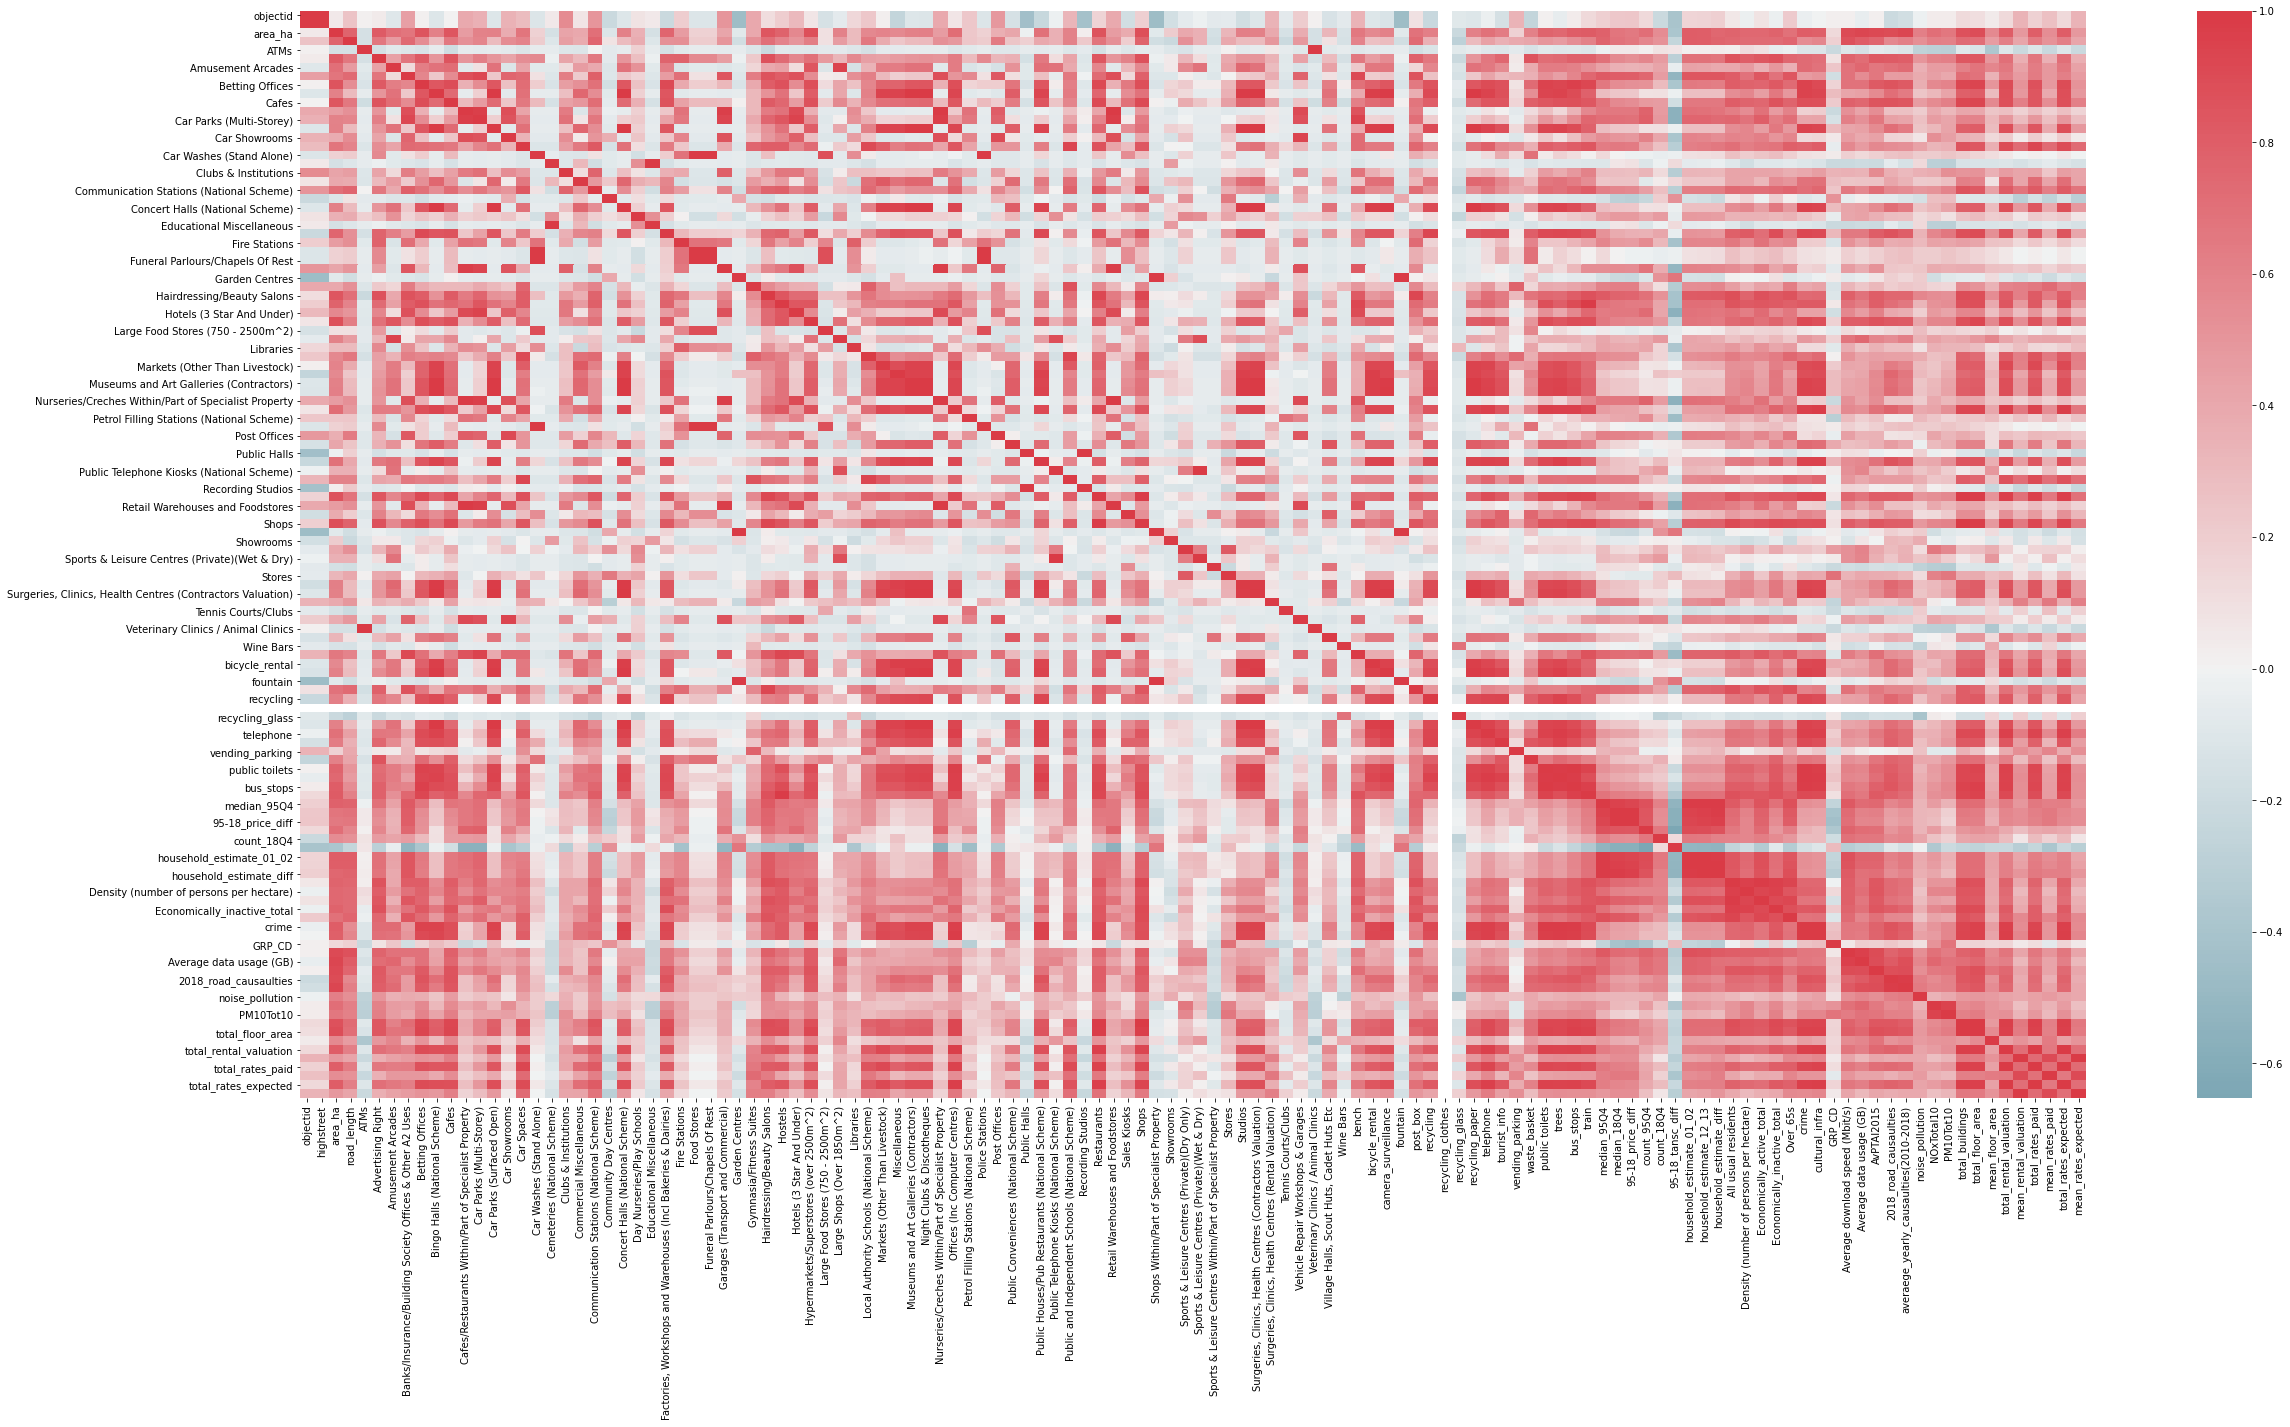

In [102]:
#check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(40, 20)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(highstreet_dimensions.corr(), cmap=cmap, center=0, annot=False, fmt=".1f")

In [103]:
print(list(highstreet_dimensions))

['objectid', 'highstreet', 'highstreet_name', 'highstre_1', 'area_ha', 'road_length', 'ATMs', 'Advertising Right', 'Amusement Arcades', 'Banks/Insurance/Building Society Offices & Other A2 Uses', 'Betting Offices', 'Bingo Halls (National Scheme)', 'Cafes', 'Cafes/Restaurants Within/Part of Specialist Property', 'Car Parks (Multi-Storey)', 'Car Parks (Surfaced Open)', 'Car Showrooms', 'Car Spaces', 'Car Washes (Stand Alone)', 'Cemeteries (National Scheme)', 'Clubs & Institutions', 'Commercial Miscellaneous', 'Communication Stations (National Scheme)', 'Community Day Centres', 'Concert Halls (National Scheme)', 'Day Nurseries/Play Schools', 'Educational Miscellaneous', 'Factories, Workshops and Warehouses (Incl Bakeries & Dairies)', 'Fire Stations', 'Food Stores', 'Funeral Parlours/Chapels Of Rest', 'Garages (Transport and Commercial)', 'Garden Centres', 'Gymnasia/Fitness Suites', 'Hairdressing/Beauty Salons', 'Hostels', 'Hotels (3 Star And Under)', 'Hypermarkets/Superstores (over 2500m^

In [104]:
highstreet_dimensions.to_csv('Camden dimensions count_1.csv')

In [105]:
X = highstreet_dimensions.copy()

In [106]:
X = X.drop(['objectid', 'highstreet', 'highstreet_name', 'highstre_1', 'geometry'], axis =1)

In [107]:
print(list(X))

['area_ha', 'road_length', 'ATMs', 'Advertising Right', 'Amusement Arcades', 'Banks/Insurance/Building Society Offices & Other A2 Uses', 'Betting Offices', 'Bingo Halls (National Scheme)', 'Cafes', 'Cafes/Restaurants Within/Part of Specialist Property', 'Car Parks (Multi-Storey)', 'Car Parks (Surfaced Open)', 'Car Showrooms', 'Car Spaces', 'Car Washes (Stand Alone)', 'Cemeteries (National Scheme)', 'Clubs & Institutions', 'Commercial Miscellaneous', 'Communication Stations (National Scheme)', 'Community Day Centres', 'Concert Halls (National Scheme)', 'Day Nurseries/Play Schools', 'Educational Miscellaneous', 'Factories, Workshops and Warehouses (Incl Bakeries & Dairies)', 'Fire Stations', 'Food Stores', 'Funeral Parlours/Chapels Of Rest', 'Garages (Transport and Commercial)', 'Garden Centres', 'Gymnasia/Fitness Suites', 'Hairdressing/Beauty Salons', 'Hostels', 'Hotels (3 Star And Under)', 'Hypermarkets/Superstores (over 2500m^2)', 'Large Food Stores (750 - 2500m^2)', 'Large Shops (Ove

In [108]:
X = X.fillna(0)

In [109]:
columns = list(X)

In [110]:
X

,area_ha,road_length,ATMs,Advertising Right,Amusement Arcades,Banks/Insurance/Building Society Offices & Other A2 Uses,Betting Offices,Bingo Halls (National Scheme),Cafes,Cafes/Restaurants Within/Part of Specialist Property,...,PM10Tot10,total_buildings,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected
0,5.069615,357.548177,0,0,0,0,0,0,2,0,...,0.358170,679,6.330958e+04,93.239439,16526340,24339.23417,2.119443e+06,4388.081366,8.260944e+06,12166.338230
1,15.327961,1508.451692,0,0,0,0,0,0,2,0,...,0.379675,1043,7.848528e+04,75.249546,14851550,14239.26174,1.351523e+06,3078.639818,7.438659e+06,7131.983653
2,56.349258,1866.945345,0,20,1,42,6,1,38,0,...,0.645800,11736,1.842300e+06,156.978526,758574264,64636.52556,1.498536e+08,15559.501940,3.860135e+08,32891.404420
3,28.338859,451.975962,0,2,0,0,1,0,0,0,...,0.369503,621,5.419681e+04,87.273450,11481400,18488.56683,1.649943e+06,4319.223482,5.734809e+06,9234.796457
4,6.303698,998.231912,0,0,0,0,0,0,6,0,...,0.512255,1198,1.547365e+05,129.162363,51672550,43132.34558,6.105202e+06,6399.582631,2.627581e+07,21933.066740
5,28.325719,1628.134358,0,22,0,24,2,0,20,0,...,0.527537,4829,6.253205e+05,129.492747,149837010,31028.57942,2.401344e+07,7159.641130,7.545396e+07,15625.173530
6,6.581487,771.530315,0,4,0,0,0,0,2,0,...,0.158470,763,7.148981e+04,93.695691,16685250,21867.95544,3.788444e+06,5828.375077,8.401444e+06,11011.066510
7,18.015724,1868.373305,0,0,0,48,0,0,6,0,...,0.214500,4095,4.311688e+05,105.291523,253360950,61870.80586,6.420256e+07,18203.163390,1.288164e+08,31457.008320
8,7.074332,512.301018,0,2,0,0,0,0,2,0,...,0.292300,1054,1.436683e+05,136.307661,46504050,44121.48956,1.186689e+07,12997.685810,2.353074e+07,22325.175950
9,11.453950,596.090408,0,4,0,0,0,0,8,0,...,0.302500,1566,2.046713e+05,130.696866,31687640,20234.76373,3.636263e+06,3156.478099,1.591674e+07,10163.944360


In [111]:
X.to_csv('dimensions ready for clustering_.csv')

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2299.000000
1,2,1436.688033
2,3,1077.160321
3,4,847.657787
4,5,707.309160
5,6,589.294649
6,7,512.168832
7,8,434.119628
8,9,355.305554
9,10,298.332251


In [113]:
X_scaled

array([[-0.75078158, -1.10491286, -0.23570226, ..., -0.58584804,
        -0.49263966, -0.4389727 ],
       [-0.08410156,  0.70644699, -0.23570226, ..., -0.85193642,
        -0.50184979, -1.04602682],
       [ 2.58183303,  1.27066545, -0.23570226, ...,  1.68426868,
         3.73843438,  2.06010372],
       ...,
       [-0.68177517, -0.76071327, -0.23570226, ..., -0.04654247,
        -0.37890277,  0.23326513],
       [ 1.9579202 ,  2.21748451, -0.23570226, ...,  0.75445924,
         1.18165415,  0.73322058],
       [-0.75301914, -0.52812335, -0.23570226, ..., -1.31617888,
        -0.56472133, -1.18902317]])

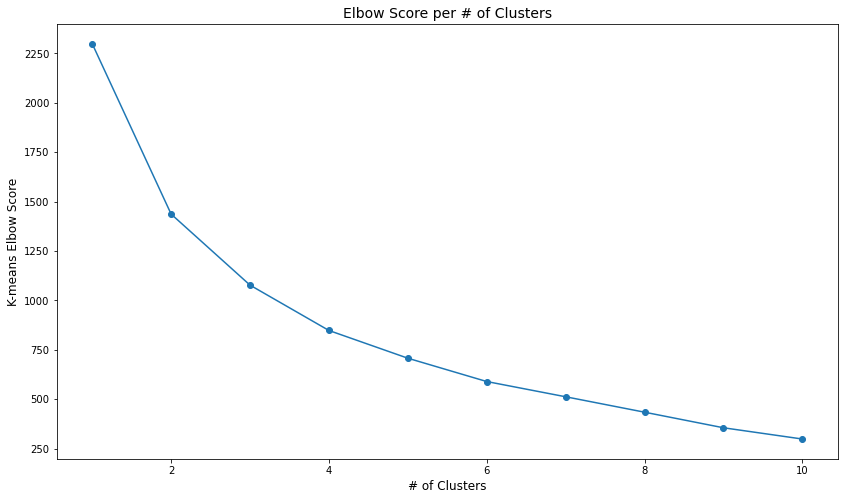

In [114]:
plt.figure(figsize=(14,8))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );
plt.xticks()
plt.xlabel('# of Clusters', fontsize=12)
plt.ylabel('K-means Elbow Score', fontsize=12)
plt.title('Elbow Score per # of Clusters', fontsize=14)

plt.savefig('outputs_img/clusters elbow score.jpg')

Using the SSE (sum of square errors) to generate a value for the optimal number of clusters. The graph shows that the optimal number cold be 5 or 6 clusters. So, the silhouette scores are also calculated in order to justify the choice between these two options.

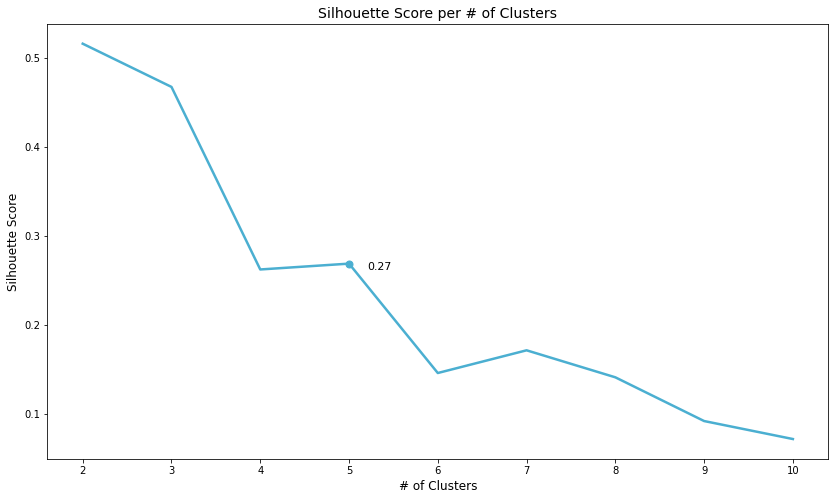

In [115]:
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters).fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, 
                                              kmeans.labels_))
    
plt.figure(figsize=(14, 8))
plt.plot(range(0, 9), silhouette_scores, color='#4bafd1', linewidth=2.5,
         marker='o', markersize=7.0, markevery=[3])
plt.annotate(round(silhouette_scores[3], 2), (3.2, silhouette_scores[2]),
             fontsize=11)
#plt.grid()
plt.xticks(ticks=range(0, 9), labels=range(2, 11))
plt.xlabel('# of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score per # of Clusters', fontsize=14)

plt.savefig('outputs_img/clusters sillouette score.jpg')

The silhouette score determines that 5 clusters is the optimal

\(S = \frac{(b - a)}{max(a, b)}\)

In [116]:
clusters = KMeans(5)  
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

highstreet_dimensions['cluster_label'] = clusters.labels_
highstreet_dimensions.head()
highstreet_dimensions.sort_values(by=['cluster_label'],ascending = True)
X.head(6)

,area_ha,road_length,ATMs,Advertising Right,Amusement Arcades,Banks/Insurance/Building Society Offices & Other A2 Uses,Betting Offices,Bingo Halls (National Scheme),Cafes,Cafes/Restaurants Within/Part of Specialist Property,...,PM10Tot10,total_buildings,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected
0,5.069615,357.548177,0,0,0,0,0,0,2,0,...,0.358170,679,6.330958e+04,93.239439,16526340,24339.23417,2.119443e+06,4388.081366,8.260944e+06,12166.338230
1,15.327961,1508.451692,0,0,0,0,0,0,2,0,...,0.379675,1043,7.848528e+04,75.249546,14851550,14239.26174,1.351523e+06,3078.639818,7.438659e+06,7131.983653
2,56.349258,1866.945345,0,20,1,42,6,1,38,0,...,0.645800,11736,1.842300e+06,156.978526,758574264,64636.52556,1.498536e+08,15559.501940,3.860135e+08,32891.404420
3,28.338859,451.975962,0,2,0,0,1,0,0,0,...,0.369503,621,5.419681e+04,87.273450,11481400,18488.56683,1.649943e+06,4319.223482,5.734809e+06,9234.796457
4,6.303698,998.231912,0,0,0,0,0,0,6,0,...,0.512255,1198,1.547365e+05,129.162363,51672550,43132.34558,6.105202e+06,6399.582631,2.627581e+07,21933.066740
5,28.325719,1628.134358,0,22,0,24,2,0,20,0,...,0.527537,4829,6.253205e+05,129.492747,149837010,31028.57942,2.401344e+07,7159.641130,7.545396e+07,15625.173530


In [117]:
highstreet_dimensions

,objectid,highstreet,highstreet_name,highstre_1,area_ha,road_length,ATMs,Advertising Right,Amusement Arcades,Banks/Insurance/Building Society Offices & Other A2 Uses,...,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected,geometry,cluster_label
0,303,303,Belsize,"Belsize Lane, Belsize Park.",5.069615,357.548177,0,0,0,0,...,6.330958e+04,93.239439,16526340,24339.23417,2.119443e+06,4388.081366,8.260944e+06,12166.338230,"POLYGON ((529676.8782000002 182864.0748999994,...",0
1,97,97,Brecknock,Brecknock Road & York Way.,15.327961,1508.451692,0,0,0,0,...,7.848528e+04,75.249546,14851550,14239.26174,1.351523e+06,3078.639818,7.438659e+06,7131.983653,"POLYGON ((523415.2819000017 186284.7258000039,...",0
2,287,287,CamdenT,Camden Town HS,56.349258,1866.945345,0,20,1,42,...,1.842300e+06,156.978526,758574264,64636.52556,1.498536e+08,15559.501940,3.860135e+08,32891.404420,"POLYGON ((525198.9937000005 185637.0811000057,...",1
3,322,322,Cricklewood,"Cricklewood Broadway, Cricklewood.",28.338859,451.975962,0,2,0,0,...,5.419681e+04,87.273450,11481400,18488.56683,1.649943e+06,4319.223482,5.734809e+06,9234.796457,"POLYGON ((529209.15749207 185757.6819612586, 5...",0
4,594,594,Eversholt,"Eversholt Street, Somers Town",6.303698,998.231912,0,0,0,0,...,1.547365e+05,129.162363,51672550,43132.34558,6.105202e+06,6399.582631,2.627581e+07,21933.066740,"POLYGON ((526892.6447000019 185059.806400001, ...",4
5,285,285,Fortress,"Fortress Road, Tufnell Park.",28.325719,1628.134358,0,22,0,24,...,6.253205e+05,129.492747,149837010,31028.57942,2.401344e+07,7159.641130,7.545396e+07,15625.173530,"POLYGON ((528129.5275000008 184489.0998000037,...",3
6,372,372,Fortune,"Fortune Green Road, Fortune Green.",6.581487,771.530315,0,4,0,0,...,7.148981e+04,93.695691,16685250,21867.95544,3.788444e+06,5828.375077,8.401444e+06,11011.066510,"POLYGON ((529626.9626000002 185290.4704000019,...",0
7,554,554,Hampstead,"Hampstead High Street, Hampstead.",18.015724,1868.373305,0,0,0,48,...,4.311688e+05,105.291523,253360950,61870.80586,6.420256e+07,18203.163390,1.288164e+08,31457.008320,"POLYGON ((528267.6189000001 185602.7545000017,...",2
8,306,306,Haverstock,"Haverstock Hill, Belsize Park.",7.074332,512.301018,0,2,0,0,...,1.436683e+05,136.307661,46504050,44121.48956,1.186689e+07,12997.685810,2.353074e+07,22325.175950,"POLYGON ((526350.251600001 184351.1093000006, ...",4
9,98,98,Kentish,Kentish Town Road.,11.453950,596.090408,0,4,0,0,...,2.046713e+05,130.696866,31687640,20234.76373,3.636263e+06,3156.478099,1.591674e+07,10163.944360,"POLYGON ((528422.0376000023 185153.5495999996,...",0


In [118]:
colours = sns.color_palette("pastel")

In [119]:
highstreet_dimensions['colour'] =  highstreet_dimensions['cluster_label'].apply(lambda x : colours[x])

In [120]:
Cluster1 = highstreet_dimensions.loc[highstreet_dimensions['cluster_label'] == 0]

In [121]:
Cluster1

,objectid,highstreet,highstreet_name,highstre_1,area_ha,road_length,ATMs,Advertising Right,Amusement Arcades,Banks/Insurance/Building Society Offices & Other A2 Uses,...,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected,geometry,cluster_label,colour
0,303,303,Belsize,"Belsize Lane, Belsize Park.",5.069615,357.548177,0,0,0,0,...,93.239439,16526340,24339.23417,2119443.30,4388.081366,8260943.66,12166.338230,"POLYGON ((529676.8782000002 182864.0748999994,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
1,97,97,Brecknock,Brecknock Road & York Way.,15.327961,1508.451692,0,0,0,0,...,75.249546,14851550,14239.26174,1351522.88,3078.639818,7438658.95,7131.983653,"POLYGON ((523415.2819000017 186284.7258000039,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
3,322,322,Cricklewood,"Cricklewood Broadway, Cricklewood.",28.338859,451.975962,0,2,0,0,...,87.273450,11481400,18488.56683,1649943.37,4319.223482,5734808.60,9234.796457,"POLYGON ((529209.15749207 185757.6819612586, 5...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
6,372,372,Fortune,"Fortune Green Road, Fortune Green.",6.581487,771.530315,0,4,0,0,...,93.695691,16685250,21867.95544,3788443.80,5828.375077,8401443.75,11011.066510,"POLYGON ((529626.9626000002 185290.4704000019,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
9,98,98,Kentish,Kentish Town Road.,11.453950,596.090408,0,4,0,0,...,130.696866,31687640,20234.76373,3636262.77,3156.478099,15916736.86,10163.944360,"POLYGON ((528422.0376000023 185153.5495999996,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
11,304,304,Loudoun,"Loudoun Road, South Hampstead.",8.078871,682.593836,0,0,0,0,...,173.298996,23638550,30344.73684,4542012.52,10866.058660,11913949.45,15293.901730,"POLYGON ((527238.2612000005 185262.4684000034,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
12,468,468,Mansfield,"Mansfield Road, Gospel Oak",3.508042,588.314081,0,2,0,0,...,68.184008,2882100,9607.00000,77929.08,581.560299,1438167.90,4793.893000,"POLYGON ((526487.2021000003 186045.8541000001,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
13,355,355,Mill,"Mill Lane, West Hampstead.",6.608539,654.448263,35,0,0,0,...,57.888446,21845600,16960.86957,2130935.81,2667.003517,10900954.40,8463.473913,"POLYGON ((524558.0969000012 184716.3947000038,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
14,328,328,Queens,"Queen?s Crescent, Gospel Oak.",10.314779,1475.410828,0,2,0,0,...,84.612851,21148250,13885.91596,2126139.67,3085.834064,10564494.75,6936.634767,"POLYGON ((529169.0482999999 184315.5594000015,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
18,373,373,Willesden,"Willesden Lane, Brondesbury.",5.035185,724.029231,0,0,0,0,...,103.296405,3633200,11834.52769,164371.79,794.066618,1825453.30,5946.101954,"POLYGON ((525496.376600001 185274.5649000052, ...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."


In [122]:
cluster = Cluster1.describe()

In [123]:
cluster.to_csv("outputs_csv/cluster0 descriptives.csv")

In [124]:
Cluster2 = highstreet_dimensions.loc[highstreet_dimensions['cluster_label'] == 1]

In [125]:
Cluster2

,objectid,highstreet,highstreet_name,highstre_1,area_ha,road_length,ATMs,Advertising Right,Amusement Arcades,Banks/Insurance/Building Society Offices & Other A2 Uses,...,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected,geometry,cluster_label,colour
2,287,287,CamdenT,Camden Town HS,56.349258,1866.945345,0,20,1,42,...,156.978526,758574264,64636.52556,149853563.2,15559.50194,386013522.2,32891.40442,"POLYGON ((525198.9937000005 185637.0811000057,...",1,"(1.0, 0.7058823529411765, 0.5098039215686274)"


In [126]:
cluster = Cluster2.describe()

In [127]:
cluster.to_csv("outputs_csv/cluster1 descriptives.csv")

In [128]:
Cluster3 = highstreet_dimensions.loc[highstreet_dimensions['cluster_label'] == 2]

In [129]:
Cluster3

,objectid,highstreet,highstreet_name,highstre_1,area_ha,road_length,ATMs,Advertising Right,Amusement Arcades,Banks/Insurance/Building Society Offices & Other A2 Uses,...,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected,geometry,cluster_label,colour
7,554,554,Hampstead,"Hampstead High Street, Hampstead.",18.015724,1868.373305,0,0,0,48,...,105.291523,253360950,61870.80586,64202557.29,18203.16339,128816449.1,31457.00832,"POLYGON ((528267.6189000001 185602.7545000017,...",2,"(0.5529411764705883, 0.8980392156862745, 0.631..."
17,555,555,WestEnd,"West End Lane, West Hampstead.",46.748979,2468.536124,0,20,0,125,...,149.645941,312326565,43336.55682,64013805.11,10983.83753,157742800.4,21887.44282,"POLYGON ((525186.4035000009 184444.9724000003,...",2,"(0.5529411764705883, 0.8980392156862745, 0.631..."


In [130]:
cluster = Cluster3.describe()

In [131]:
cluster.to_csv("outputs_csv/cluster2 descriptives.csv")

In [132]:
Cluster4 = highstreet_dimensions.loc[highstreet_dimensions['cluster_label'] == 3]

In [133]:
Cluster4

,objectid,highstreet,highstreet_name,highstre_1,area_ha,road_length,ATMs,Advertising Right,Amusement Arcades,Banks/Insurance/Building Society Offices & Other A2 Uses,...,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected,geometry,cluster_label,colour
5,285,285,Fortress,"Fortress Road, Tufnell Park.",28.325719,1628.134358,0,22,0,24,...,129.492747,149837010,31028.57942,24013436.35,7159.64113,75453962.99,15625.17353,"POLYGON ((528129.5275000008 184489.0998000037,...",3,"(1.0, 0.6235294117647059, 0.6078431372549019)"
10,335,335,Kilburn,"Kilburn High Road, Kilburn.",39.984193,2008.894097,0,8,1,6,...,186.942282,116043050,39006.06723,23630038.65,12912.58943,58695595.95,19729.61208,"POLYGON ((525207.510900001 185291.2002000008, ...",3,"(1.0, 0.6235294117647059, 0.6078431372549019)"


In [134]:
cluster = Cluster4.describe()

In [135]:
cluster.to_csv("outputs_csv/cluster3 descriptives.csv")

In [136]:
Cluster5 = highstreet_dimensions.loc[highstreet_dimensions['cluster_label'] == 4]

In [137]:
Cluster5

,objectid,highstreet,highstreet_name,highstre_1,area_ha,road_length,ATMs,Advertising Right,Amusement Arcades,Banks/Insurance/Building Society Offices & Other A2 Uses,...,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected,geometry,cluster_label,colour
4,594,594,Eversholt,"Eversholt Street, Somers Town",6.303698,998.231912,0,0,0,0,...,129.162363,51672550,43132.34558,6105201.83,6399.582631,26275813.95,21933.06674,"POLYGON ((526892.6447000019 185059.806400001, ...",4,"(0.8156862745098039, 0.7333333333333333, 1.0)"
8,306,306,Haverstock,"Haverstock Hill, Belsize Park.",7.074332,512.301018,0,2,0,0,...,136.307661,46504050,44121.48956,11866887.14,12997.685810,23530735.45,22325.17595,"POLYGON ((526350.251600001 184351.1093000006, ...",4,"(0.8156862745098039, 0.7333333333333333, 1.0)"
15,324,324,Regents,Regent?s Park Road.,6.568312,394.131100,0,0,0,0,...,85.352480,69719050,50557.68673,8135374.40,8127.247153,35297579.45,25596.50431,"POLYGON ((527231.813500002 185728.7449000031, ...",4,"(0.8156862745098039, 0.7333333333333333, 1.0)"
16,307,307,SouthEnd,"South End Road, Hampstead.",6.131431,576.246033,0,2,0,0,...,94.480619,36636200,35294.99037,5182945.81,7042.045938,18415435.30,17741.26715,"POLYGON ((528024.9389000041 184302.0733000021,...",4,"(0.8156862745098039, 0.7333333333333333, 1.0)"


In [138]:
cluster = Cluster5.describe()

In [139]:
cluster.to_csv("outputs_csv/cluster5 descriptives.csv")

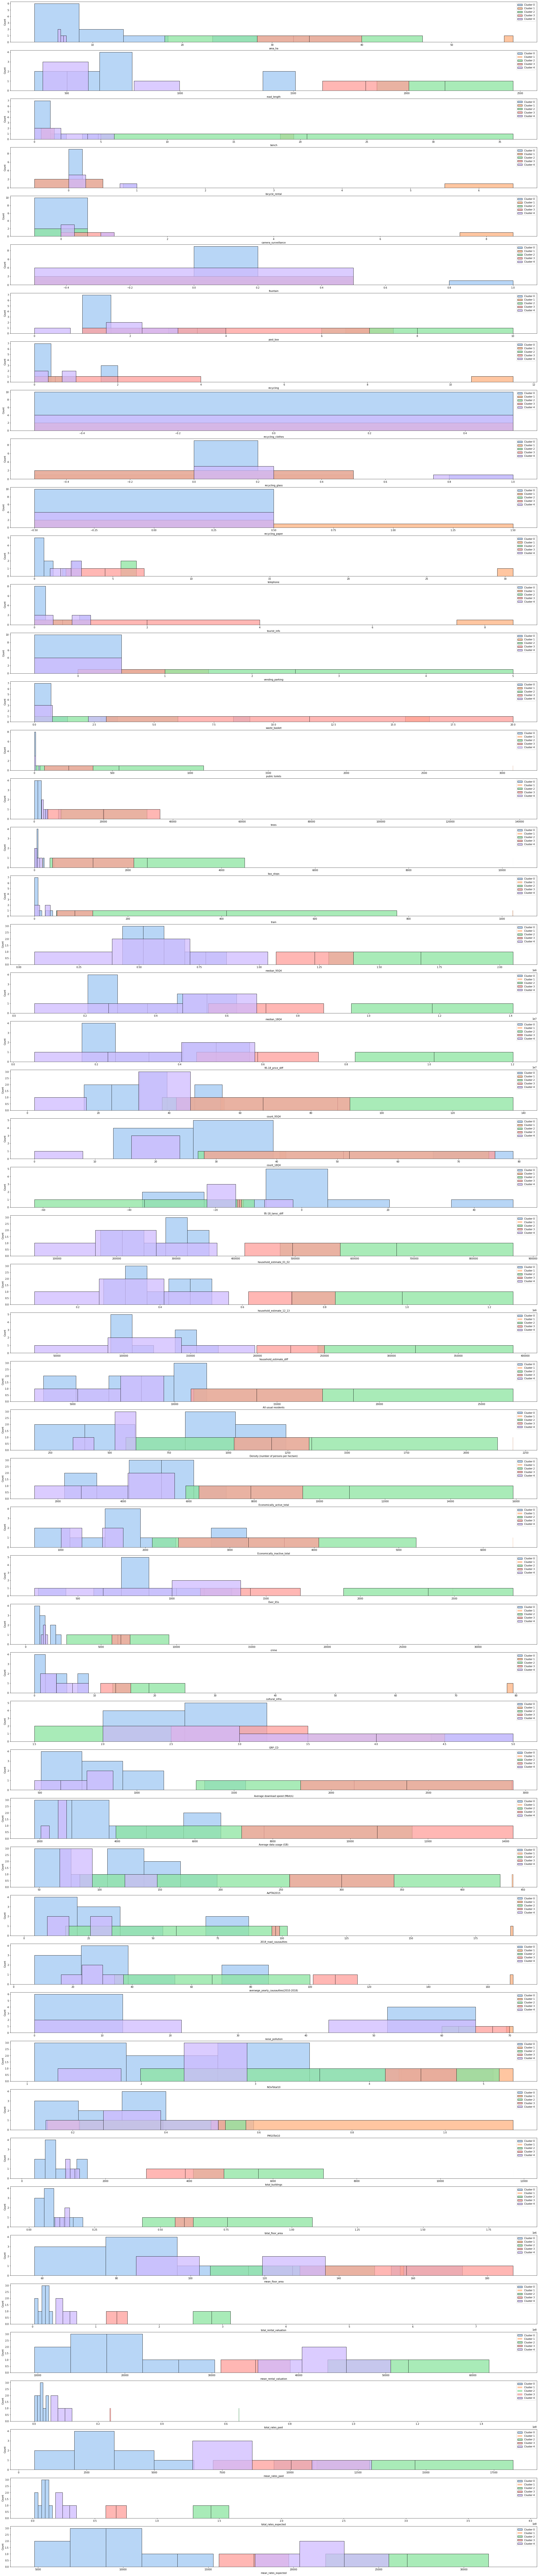

In [140]:
fig, ax = plt.subplots(nrows=53, ncols=1, figsize=(40, 200))


for i, a in enumerate(['area_ha', 'road_length', 'bench', 'bicycle_rental', 'camera_surveillance', 'fountain', 'post_box', 'recycling', 'recycling_clothes', 'recycling_glass', 'recycling_paper', 'telephone', 'tourist_info', 'vending_parking', 'waste_basket', 'public toilets', 'trees', 'bus_stops', 'train', 'median_95Q4', 'median_18Q4', '95-18_price_diff', 'count_95Q4', 'count_18Q4', '95-18_tansc_diff', 'household_estimate_01_02', 'household_estimate_12_13', 'household_estimate_diff', 'All usual residents', 'Density (number of persons per hectare)', 'Economically_active_total', 'Economically_inactive_total', 'Over_65s', 'crime', 'cultural_infra', 'GRP_CD', 'Average download speed (Mbit/s)', 'Average data usage (GB)', 'AvPTAI2015', '2018_road_causaulties', 'averaege_yearly_causaulties(2010-2018)', 'noise_pollution', 'NOxTotal10', 'PM10Tot10', 'total_buildings', 'total_floor_area', 'mean_floor_area', 'total_rental_valuation', 'mean_rental_valuation', 'total_rates_paid', 'mean_rates_paid', 'total_rates_expected', 'mean_rates_expected']):
    
    
    sns.histplot(ax=ax[i], label="Cluster 0", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==0], x=a, color=colours[0])
    sns.histplot( ax=ax[i],label="Cluster 1", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==1], x=a, color=colours[1])
    sns.histplot(ax=ax[i],label="Cluster 2", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==2], x=a, color=colours[2])
    sns.histplot( ax=ax[i],label="Cluster 3", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==3], x=a, color=colours[3])
    sns.histplot( ax=ax[i],label="Cluster 4", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==4], x=a, color=colours[4])

    ax[i].legend()
    
#fig.savefig('Camden High Street Clusters.jpg')

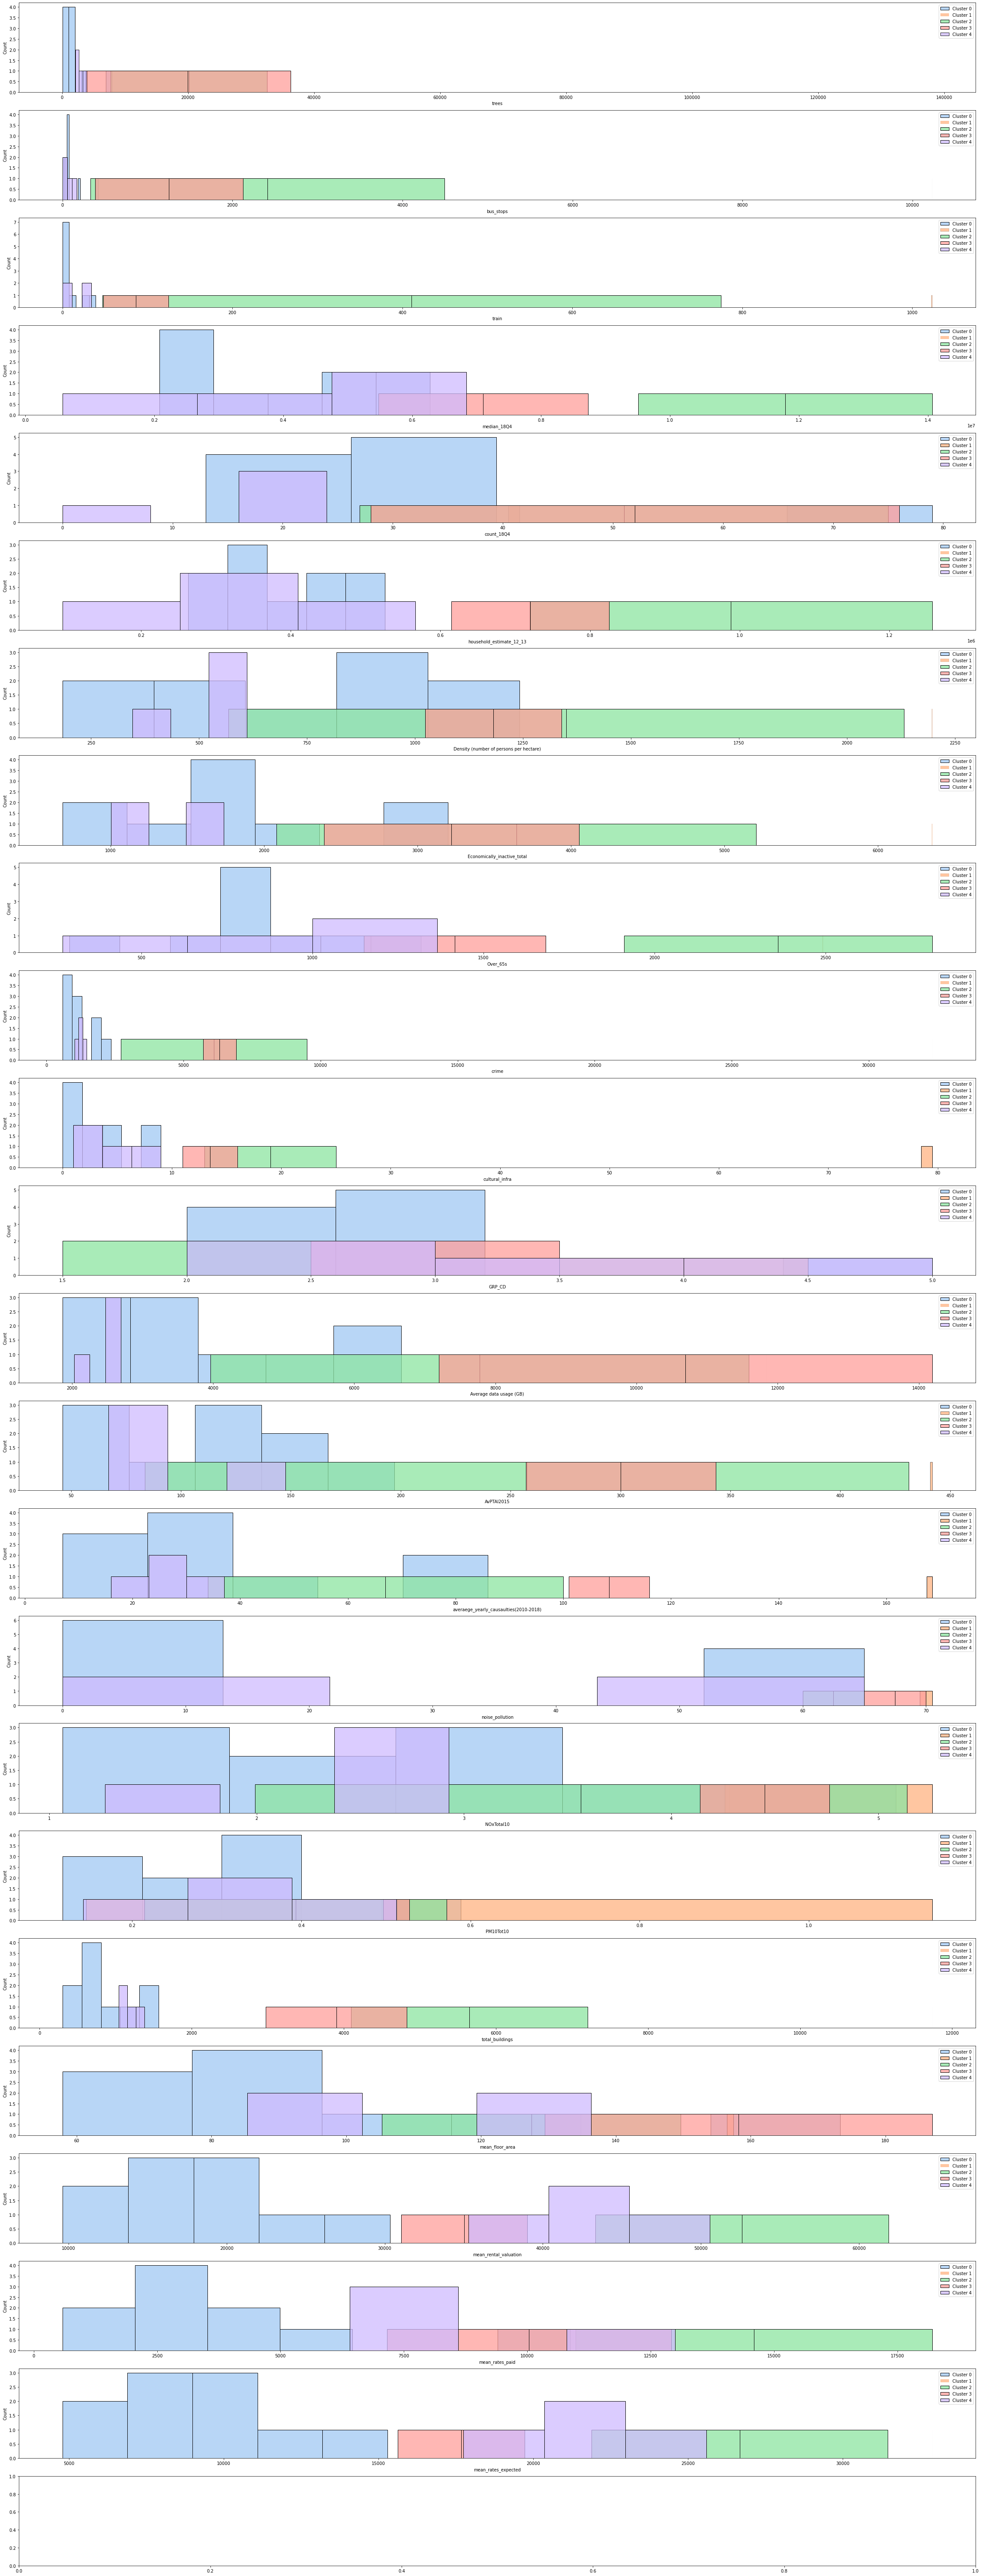

In [141]:
fig, ax = plt.subplots(nrows=24, ncols=1, figsize=(40, 110))


for i, a in enumerate(['trees', 'bus_stops', 'train', 'median_18Q4', 'count_18Q4', 'household_estimate_12_13', 'Density (number of persons per hectare)', 'Economically_inactive_total', 'Over_65s', 'crime', 'cultural_infra', 'GRP_CD', 'Average data usage (GB)', 'AvPTAI2015', 'averaege_yearly_causaulties(2010-2018)', 'noise_pollution', 'NOxTotal10', 'PM10Tot10', 'total_buildings', 'mean_floor_area',  'mean_rental_valuation', 'mean_rates_paid', 'mean_rates_expected']):
    
    
    sns.histplot(ax=ax[i], label="Cluster 0", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==0], x=a, color=colours[0])
    sns.histplot( ax=ax[i],label="Cluster 1", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==1], x=a, color=colours[1])
    sns.histplot(ax=ax[i],label="Cluster 2", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==2], x=a, color=colours[2])
    sns.histplot( ax=ax[i],label="Cluster 3", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==3], x=a, color=colours[3])
    sns.histplot( ax=ax[i],label="Cluster 4", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==4], x=a, color=colours[4])

    ax[i].legend()
    
fig.savefig('Camden High Street Clusters charts.jpg')

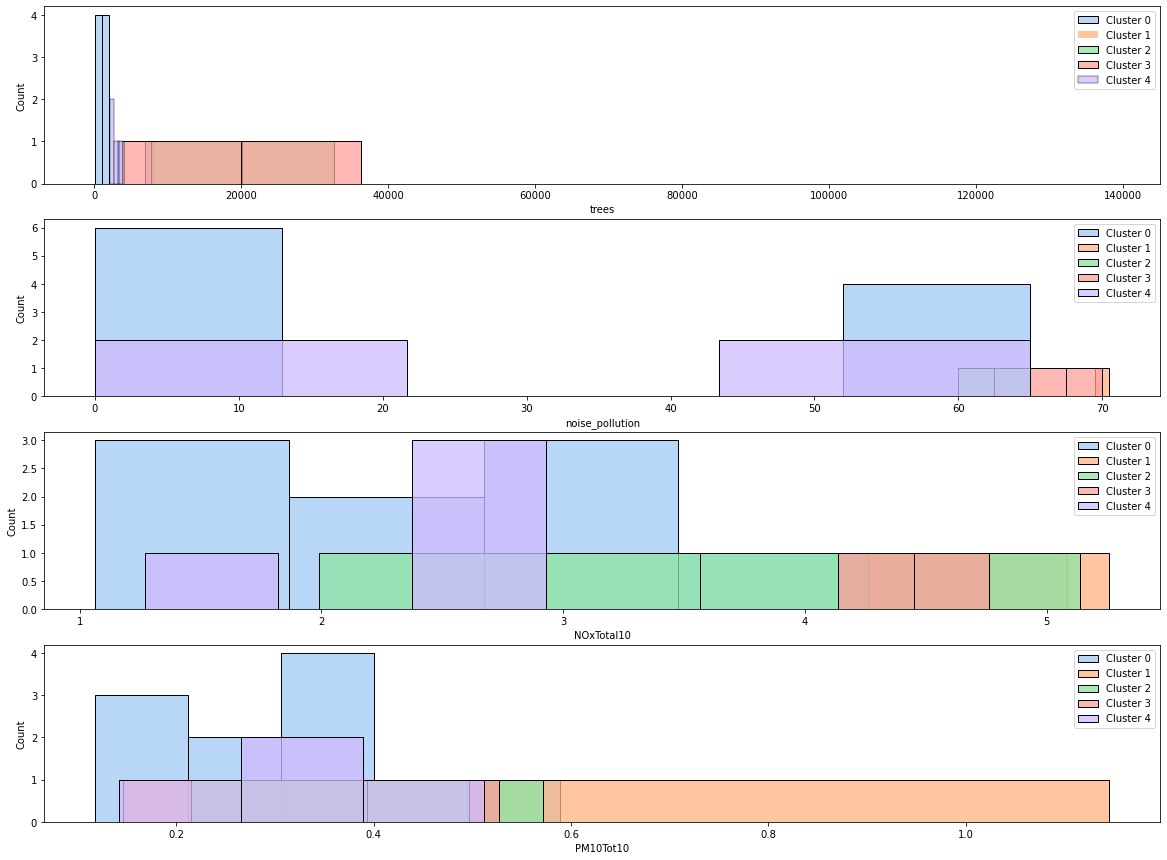

In [162]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 15))


for i, a in enumerate(['trees','noise_pollution', 'NOxTotal10', 'PM10Tot10']):
    
    
    sns.histplot(ax=ax[i], label="Cluster 0", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==0], x=a, color=colours[0])
    sns.histplot( ax=ax[i],label="Cluster 1", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==1], x=a, color=colours[1])
    sns.histplot(ax=ax[i],label="Cluster 2", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==2], x=a, color=colours[2])
    sns.histplot( ax=ax[i],label="Cluster 3", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==3], x=a, color=colours[3])
    sns.histplot( ax=ax[i],label="Cluster 4", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==4], x=a, color=colours[4])
   

    ax[i].legend()
    
fig.savefig('Camden High Street Clusters environmental charts.jpg')

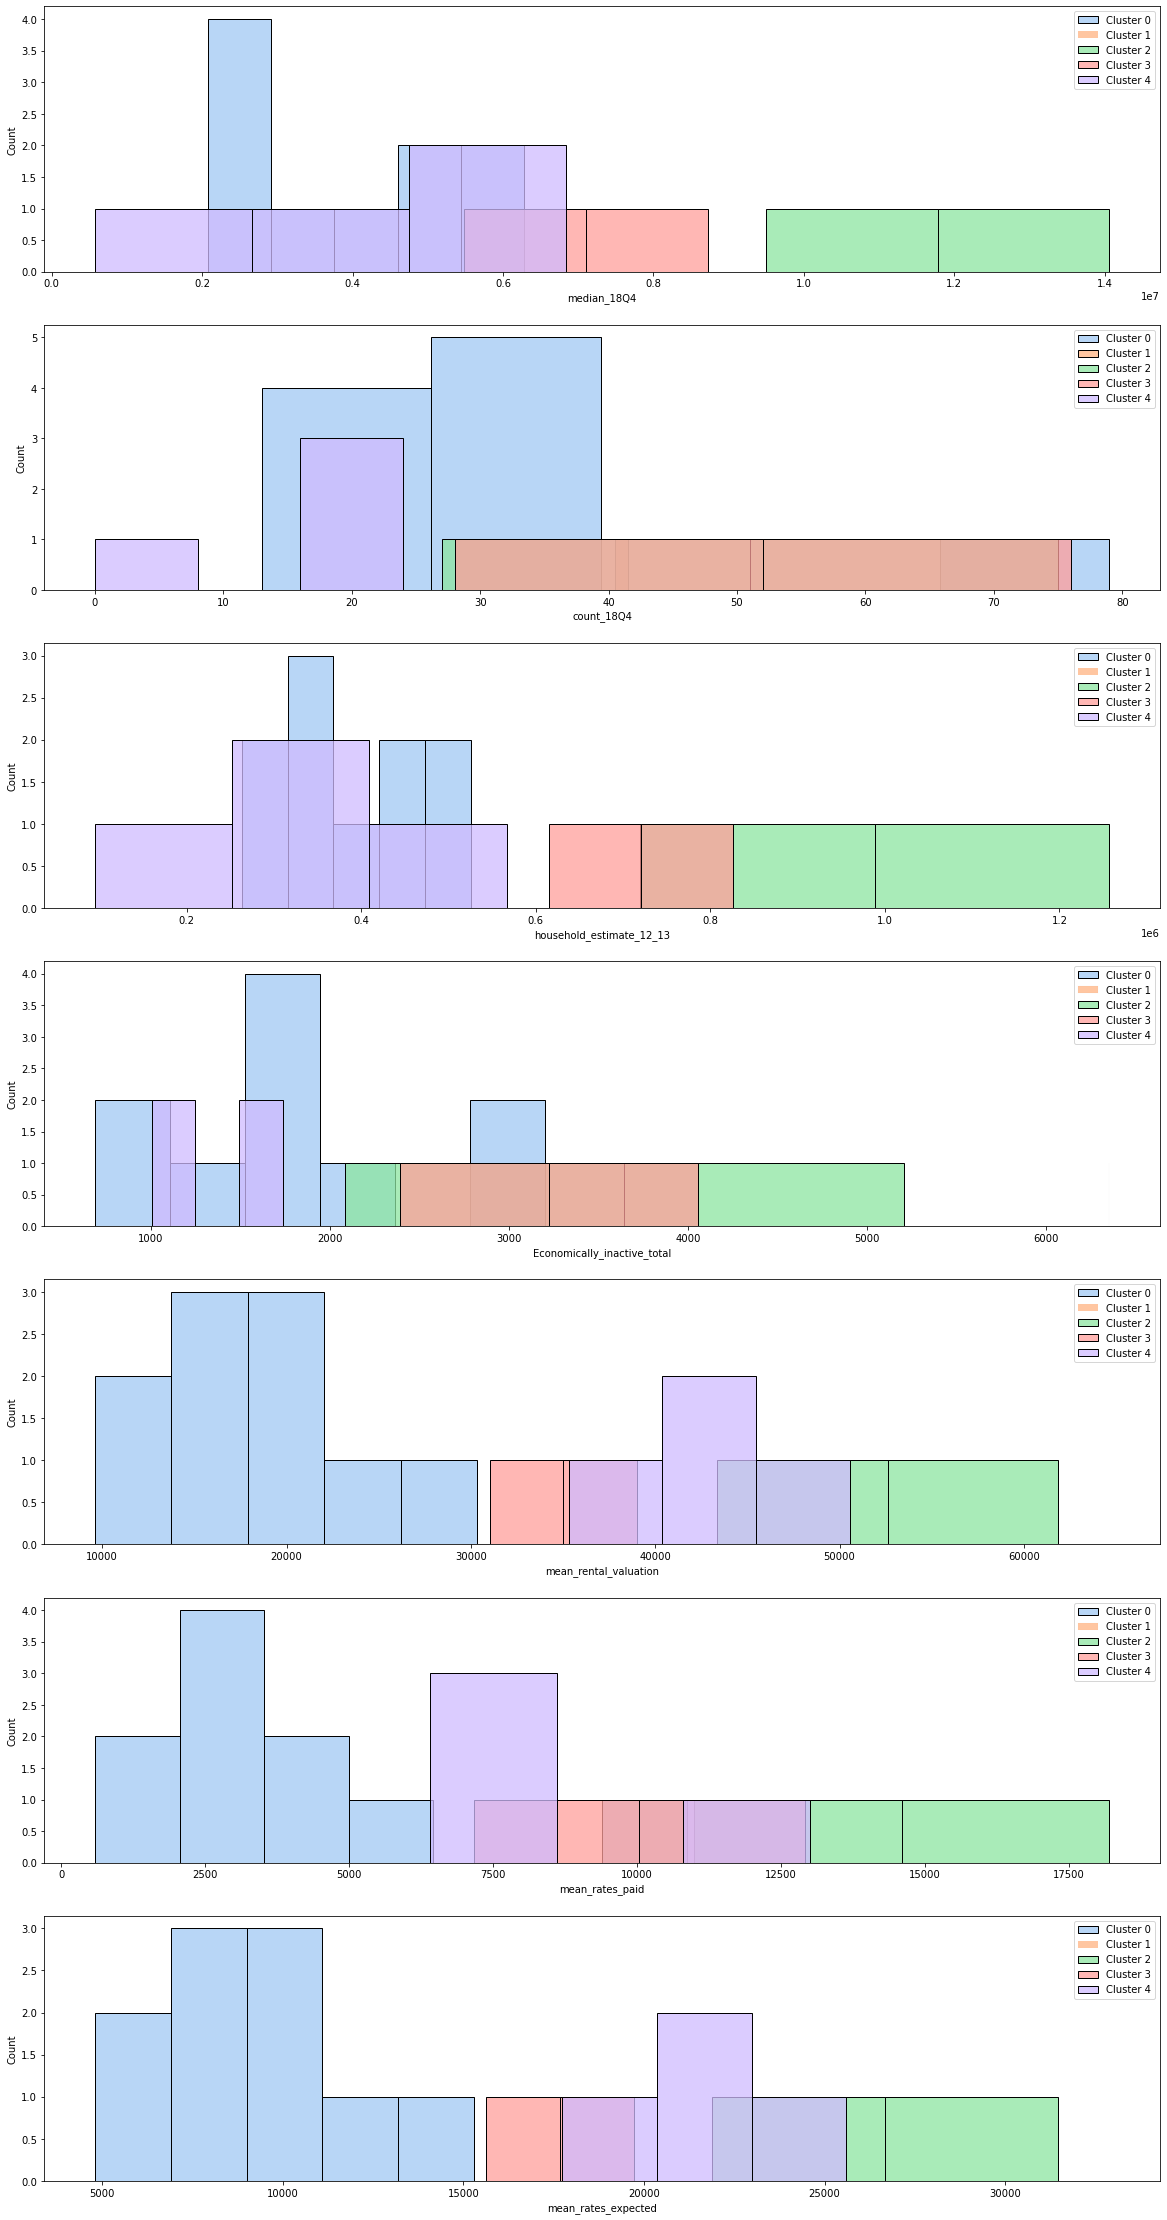

In [163]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(20, 40))


for i, a in enumerate(['median_18Q4', 'count_18Q4', 'household_estimate_12_13', 'Economically_inactive_total', 'mean_rental_valuation', 'mean_rates_paid', 'mean_rates_expected']):
    
    
    sns.histplot(ax=ax[i], label="Cluster 0", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==0], x=a, color=colours[0])
    sns.histplot( ax=ax[i],label="Cluster 1", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==1], x=a, color=colours[1])
    sns.histplot(ax=ax[i],label="Cluster 2", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==2], x=a, color=colours[2])
    sns.histplot( ax=ax[i],label="Cluster 3", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==3], x=a, color=colours[3])
    sns.histplot( ax=ax[i],label="Cluster 4", data=highstreet_dimensions[highstreet_dimensions['cluster_label']==4], x=a, color=colours[4])
    

    ax[i].legend()
    
fig.savefig('Camden High Street Clusters economic charts.jpg')

In [144]:
CamHS = gpd.read_file('Complete HS/CAMDEN_HS.shp')

In [145]:
CamHS

,objectid,highstreet,highstre_1,area_ha,gdb_geomat,layer,path,geometry
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18..."
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18..."
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18..."
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18..."
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18..."
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18..."
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18..."
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18..."
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18..."
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18..."


<AxesSubplot:>

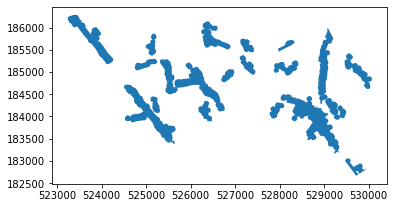

In [146]:
CamHS.plot()

In [147]:
highstreet_dimensions

,objectid,highstreet,highstreet_name,highstre_1,area_ha,road_length,ATMs,Advertising Right,Amusement Arcades,Banks/Insurance/Building Society Offices & Other A2 Uses,...,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected,geometry,cluster_label,colour
0,303,303,Belsize,"Belsize Lane, Belsize Park.",5.069615,357.548177,0,0,0,0,...,93.239439,16526340,24339.23417,2.119443e+06,4388.081366,8.260944e+06,12166.338230,"POLYGON ((529676.8782000002 182864.0748999994,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
1,97,97,Brecknock,Brecknock Road & York Way.,15.327961,1508.451692,0,0,0,0,...,75.249546,14851550,14239.26174,1.351523e+06,3078.639818,7.438659e+06,7131.983653,"POLYGON ((523415.2819000017 186284.7258000039,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
2,287,287,CamdenT,Camden Town HS,56.349258,1866.945345,0,20,1,42,...,156.978526,758574264,64636.52556,1.498536e+08,15559.501940,3.860135e+08,32891.404420,"POLYGON ((525198.9937000005 185637.0811000057,...",1,"(1.0, 0.7058823529411765, 0.5098039215686274)"
3,322,322,Cricklewood,"Cricklewood Broadway, Cricklewood.",28.338859,451.975962,0,2,0,0,...,87.273450,11481400,18488.56683,1.649943e+06,4319.223482,5.734809e+06,9234.796457,"POLYGON ((529209.15749207 185757.6819612586, 5...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
4,594,594,Eversholt,"Eversholt Street, Somers Town",6.303698,998.231912,0,0,0,0,...,129.162363,51672550,43132.34558,6.105202e+06,6399.582631,2.627581e+07,21933.066740,"POLYGON ((526892.6447000019 185059.806400001, ...",4,"(0.8156862745098039, 0.7333333333333333, 1.0)"
5,285,285,Fortress,"Fortress Road, Tufnell Park.",28.325719,1628.134358,0,22,0,24,...,129.492747,149837010,31028.57942,2.401344e+07,7159.641130,7.545396e+07,15625.173530,"POLYGON ((528129.5275000008 184489.0998000037,...",3,"(1.0, 0.6235294117647059, 0.6078431372549019)"
6,372,372,Fortune,"Fortune Green Road, Fortune Green.",6.581487,771.530315,0,4,0,0,...,93.695691,16685250,21867.95544,3.788444e+06,5828.375077,8.401444e+06,11011.066510,"POLYGON ((529626.9626000002 185290.4704000019,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
7,554,554,Hampstead,"Hampstead High Street, Hampstead.",18.015724,1868.373305,0,0,0,48,...,105.291523,253360950,61870.80586,6.420256e+07,18203.163390,1.288164e+08,31457.008320,"POLYGON ((528267.6189000001 185602.7545000017,...",2,"(0.5529411764705883, 0.8980392156862745, 0.631..."
8,306,306,Haverstock,"Haverstock Hill, Belsize Park.",7.074332,512.301018,0,2,0,0,...,136.307661,46504050,44121.48956,1.186689e+07,12997.685810,2.353074e+07,22325.175950,"POLYGON ((526350.251600001 184351.1093000006, ...",4,"(0.8156862745098039, 0.7333333333333333, 1.0)"
9,98,98,Kentish,Kentish Town Road.,11.453950,596.090408,0,4,0,0,...,130.696866,31687640,20234.76373,3.636263e+06,3156.478099,1.591674e+07,10163.944360,"POLYGON ((528422.0376000023 185153.5495999996,...",0,"(0.6313725490196078, 0.788235294117647, 0.9568..."


In [148]:
highstreet_dimensions = highstreet_dimensions.drop(columns=['geometry'])

In [149]:
Camden = CamHS.merge(highstreet_dimensions, on="objectid")

In [150]:
Camden

,objectid,highstreet_x,highstre_1_x,area_ha_x,gdb_geomat,layer,path,geometry,highstreet_y,highstreet_name,...,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected,cluster_label,colour
0,594,594,"Eversholt Street, Somers Town",6.303698,None,Eversholt,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529676.878 182864.075, 529679.937 18...",594,Eversholt,...,1.547365e+05,129.162363,51672550,43132.34558,6.105202e+06,6399.582631,2.627581e+07,21933.066740,4,"(0.8156862745098039, 0.7333333333333333, 1.0)"
1,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,Cricklewood,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((523415.282 186284.726, 523422.134 18...",322,Cricklewood,...,5.419681e+04,87.273450,11481400,18488.56683,1.649943e+06,4319.223482,5.734809e+06,9234.796457,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
2,372,372,"Fortune Green Road, Fortune Green.",6.581487,None,Fortune,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((525198.994 185637.081, 525201.838 18...",372,Fortune,...,7.148981e+04,93.695691,16685250,21867.95544,3.788444e+06,5828.375077,8.401444e+06,11011.066510,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
3,285,285,"Fortress Road, Tufnell Park.",28.325719,None,Fortress,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529209.157 185757.682, 529206.506 18...",285,Fortress,...,6.253205e+05,129.492747,149837010,31028.57942,2.401344e+07,7159.641130,7.545396e+07,15625.173530,3,"(1.0, 0.6235294117647059, 0.6078431372549019)"
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,Belsize,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526892.645 185059.806, 526900.890 18...",303,Belsize,...,6.330958e+04,93.239439,16526340,24339.23417,2.119443e+06,4388.081366,8.260944e+06,12166.338230,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
5,287,287,Camden Town HS,56.349258,None,CamdenT,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528129.528 184489.100, 528138.350 18...",287,CamdenT,...,1.842300e+06,156.978526,758574264,64636.52556,1.498536e+08,15559.501940,3.860135e+08,32891.404420,1,"(1.0, 0.7058823529411765, 0.5098039215686274)"
6,97,97,Brecknock Road & York Way.,15.327961,None,Brecknock,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((529626.963 185290.470, 529619.385 18...",97,Brecknock,...,7.848528e+04,75.249546,14851550,14239.26174,1.351523e+06,3078.639818,7.438659e+06,7131.983653,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
7,468,468,"Mansfield Road, Gospel Oak",3.508042,None,Mansfield,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528267.619 185602.755, 527975.356 18...",468,Mansfield,...,2.045520e+04,68.184008,2882100,9607.00000,7.792908e+04,581.560299,1.438168e+06,4793.893000,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
8,304,304,"Loudoun Road, South Hampstead.",8.078871,None,Loudoun,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((526350.252 184351.109, 526360.006 18...",304,Loudoun,...,1.349999e+05,173.298996,23638550,30344.73684,4.542013e+06,10866.058660,1.191395e+07,15293.901730,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
9,328,328,"Queen?s Crescent, Gospel Oak.",10.314779,None,Queens,C:/Users/CHRISTINA/OneDrive - University Colle...,"POLYGON ((528422.038 185153.550, 528417.412 18...",328,Queens,...,1.288654e+05,84.612851,21148250,13885.91596,2.126140e+06,3085.834064,1.056449e+07,6936.634767,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."


In [151]:
Camden.to_csv("outputs_csv/cluster results csv file.csv")

<AxesSubplot:>

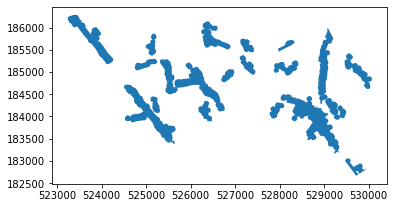

In [152]:
Camden.plot()

In [153]:
CAMDEN = gpd.read_file("OSM Camden/Camden Borough.shp")

In [154]:
cam_buildings = gpd.read_file("OSM Camden/Camden Buildings.shp")

In [155]:
cam_buildings = cam_buildings.to_crs('EPSG:27700')

In [156]:
green = gpd.read_file("OSM Camden/Camden clipped greenspace.shp")

In [157]:
green = green.to_crs('EPSG:27700')

In [158]:
roads = gpd.read_file("OSM Camden/Camden clipped roads.shp")

In [159]:
roads = roads.to_crs('EPSG:27700')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/opt/conda/envs/sds2020/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


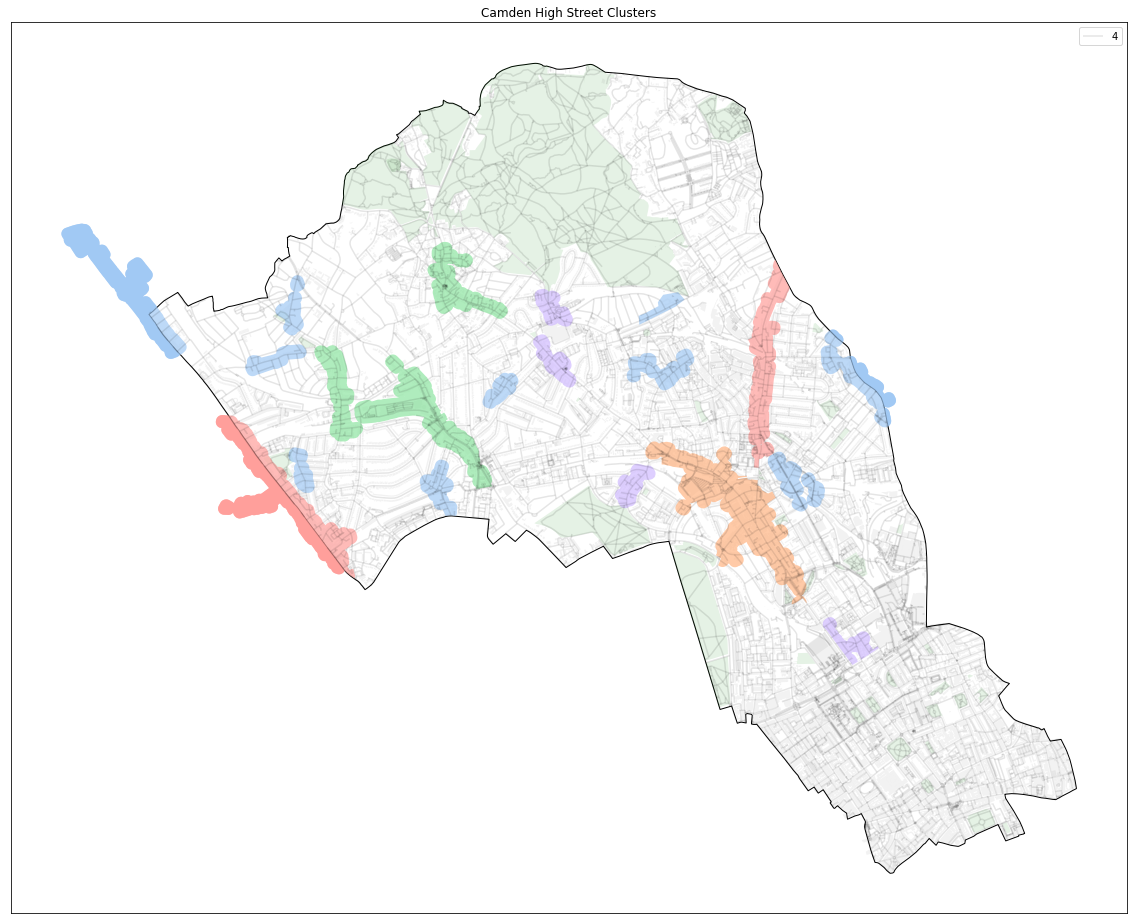

In [160]:
fig, ax = plt.subplots(1,1, figsize=(20,20))


Camden.plot('Cluster', color= Camden['colour'], ax=ax)
CAMDEN.plot(edgecolor= 'black', facecolor='white', ax=ax)

green.plot(color="green", alpha = 0.1, ax=ax)
roads.plot(color="black", alpha = 0.1, ax=ax)
cam_buildings.plot(color="grey", alpha = 0.1, ax=ax)
Camden.plot('Cluster', color= Camden['colour'], alpha = 0.7, ax=ax)


ax.set_title( 'Camden High Street Clusters')
ax.legend(Camden['cluster_label'])

ax.set_xticks([])
ax.set_yticks([])

fig.savefig('outputs_img/Camden High Street clusters(map).jpg')

NameError: name 'radar_1' is not defined

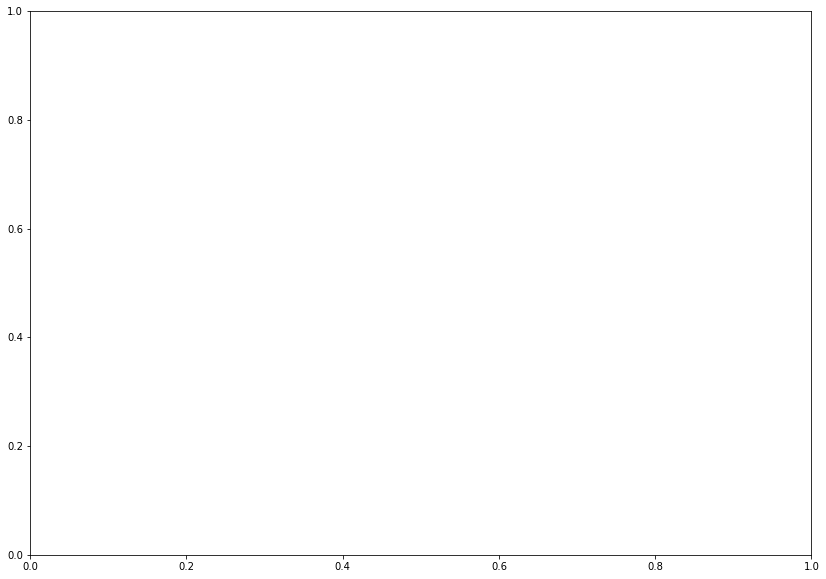

In [161]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variables
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
plt.ylim(-1,0.6)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="1st Cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))